# Prerequsite test

Submitted by:
```
Kowsik Nandagopan D
22250016
MTech CSE First Year
```


## 1.
When we are multiplying two matrices of order (n, k) and (k, m) there are 
- `n * k * m` multiplications. 
  - Because when we do dot product the first row of first matrix (k elements) with the first column of the second matrix (k elements) there are `k` multiplications.
  - We iterate over the column of second matrix giveng us `k * m` multiplication
  - Then we iterate over the rows giving a total of `n * k * m` multiplications
- `n * (k - 1) * m`
  - When we take a dot product of `k` elements each we do (k-1) additions in between
  - For first row of first matrix we do `m` dot products.
  - Iterating over the rows of first matrix, we get `n * (k - 1) * m` additions

## 2.

Python program for multiplication with list

In [2]:
def simple_multiplication(A, B):
  n = len(A)
  k = len(A[0])
  m = len(B[0])
  
  result = []
  for i in range(n):
    temp = []
    for j in range(m):
      sm = 0
      for p in range(k):
        sm += A[i][p] * B[p][j]
      temp.append(sm)
    result.append(temp)
  return result

In [3]:
A = [[1, 2, 3], [4, 5, 6]]
B = [[1, 2], [3, 4], [5, 6]]
simple_multiplication(A, B)

[[22, 28], [49, 64]]

Numpy variation

In [4]:
import numpy as np

In [5]:
def numpy_multiplication(A, B):
  return np.matmul(A, B)

In [6]:
numpy_multiplication(np.array(A), np.array(B))

array([[22, 28],
       [49, 64]])

Time Comparison

In [7]:
n, k, m = 100, 200, 300
A_np = np.random.rand(n, k)
B_np = np.random.rand(k, m)

A = A_np.tolist()
B = B_np.tolist()

In [8]:
%timeit simple_multiplication(A, B)
%timeit numpy_multiplication(A_np, B_np)

1.26 s ± 39.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
521 µs ± 20.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


It is clear that **`numpy` based multiplication excuted way faster** than the list based one. This is because,  of the following reasons,
  - Stores data in continuous memory location, and homogeneous data type
  - Parallel processing implemented inside numpy (vectorisation)
  - C is used in the background of numpy, which executes way faster than Python

## 3

Using each passes to find the next biggest element to find median takes $n/2$ passes over array of size $n$. So the time complexity is $O(n)$. Consider the following implementation.


In [54]:
import sys

In [57]:
def arr_median(arr):
  median = max(arr) # One pass
  n = len(arr)
  m = n // 2
  m -= 0 if n % 2 else 1 # For odd numbers just finds till n/2+1 th largest
  for i in range(m):
    mx = -sys.maxsize - 1
    for j in range(n):
      if arr[j] < median and mx < arr[j]:
        mx = arr[j]
    median = mx

  if n % 2 == 0: # For odd numbers takes n / 2th number also and sends the average
    mx = -sys.maxsize - 1 
    for j in range(n):
      if arr[j] < median and mx < arr[j]:
        mx = arr[j]
    median = (median + mx) / 2

  return float(median)

In [58]:
arr_median([6, 3, 2, 1, 5, 4])

3.5

In [ ]:
# def better_median(arr):


In [22]:
np.median([1, 2, 3, 4, 5, 6])

3.5

## 4

Gradient of funtion $x^{2}y + y^{3}sin(x)$
- With respect to x is $2xy + y^{3}cos(x)$
- With respect to y is $x^{2} + 3y^{2}sin(x)$

## 5

In [59]:
import jax

Without using `JAX` value of gradient

In [60]:
def f(x, y):
  return x**2 * y + y**3 * jax.numpy.sin(x)

def dfdx(x, y):
  return 2 * x * y + y**3 * jax.numpy.cos(x)

def dfdy(x, y):
  return x**2 + 3 * y**2 * jax.numpy.sin(x)

print("f(1, 1)=", f(1.0, 1.0))
print("dfdx(1, 1)=", dfdx(1.0, 1.0))
print("dfdy(1, 1)=", dfdy(1.0, 1.0))

f(1, 1)= 1.841471
dfdx(1, 1)= 2.5403023
dfdy(1, 1)= 3.5244129


Verifying using the `JAX`

In [61]:
dfdx_jax = jax.grad(f, argnums=0) # With respect to x
dfdy_jax = jax.grad(f, argnums=1) # With respect to y
print("dfdx(1, 1)=", dfdx_jax(1.0, 1.0))
print("dfdy(1, 1)=", dfdy_jax(1.0, 1.0))

dfdx(1, 1)= 2.5403023
dfdy(1, 1)= 3.5244129


Both the gradients are same for the JAX and non-JAX implimentation

## 6

In [68]:
import sympy
sympy.init_printing(use_unicode=True)

In [70]:
x_sy , y_sy = sympy.symbols('x y')

In [77]:
f = (x_sy**2) * y_sy + (y_sy**3) * sympy.sin(x_sy)
f

In [82]:
print("Gradient with respect to x:", sympy.diff(f, x_sy))
print("Gradient with respect to y:", sympy.diff(f, y_sy))

Gradient with respect to x: 2*x*y + y**3*cos(x)
Gradient with respect to y: x**2 + 3*y**2*sin(x)


## 7

In [79]:
d = { 
  2022: {
  "Branch 1": [{"Roll Number": 1, "Name": "A", "Marks": {"Maths": 100, "English": 70}}, {"Roll Number": 2, "Name": "B", "Marks": {"Maths": 90, "English": 80}}],
  "Branch 2":[{"Roll Number": 3, "Name": "C", "Marks": {"Maths": 100, "English": 70}}, {"Roll Number": 4, "Name": "D", "Marks": {"Maths": 90, "English": 80}}]
  },
  2023: {
  "Branch 1": [{"Roll Number": 5, "Name": "E", "Marks": {"Maths": 100, "English": 70}}, {"Roll Number": 6, "Name": "F", "Marks": {"Maths": 90, "English": 80}}],
  "Branch 2":[{"Roll Number": 7, "Name": "G", "Marks": {"Maths": 100, "English": 70}}, {"Roll Number": 8, "Name": "H", "Marks": {"Maths": 90, "English": 80}}]
  },
  2024: {
  "Branch 1": [{"Roll Number": 9, "Name": "I", "Marks": {"Maths": 100, "English": 70}}, {"Roll Number": 10, "Name": "J", "Marks": {"Maths": 90, "English": 80}}],
  "Branch 2":[{"Roll Number": 11, "Name": "K", "Marks": {"Maths": 100, "English": 70}}, {"Roll Number": 12, "Name": "L", "Marks": {"Maths": 90, "English": 80}}]
  },
  2025: {
  "Branch 1": [{"Roll Number": 13, "Name": "M", "Marks": {"Maths": 100, "English": 70}}, {"Roll Number": 14, "Name": "N", "Marks": {"Maths": 90, "English": 80}}],
  "Branch 2":[{"Roll Number": 15, "Name": "O", "Marks": {"Maths": 100, "English": 70}}, {"Roll Number": 16, "Name": "P", "Marks": {"Maths": 90, "English": 80}}]
  }
}

In [ ]:
!pip install rich

In [85]:
from rich.pretty import pprint

In [86]:
pprint(d)

{
│   2022: {
│   │   'Branch 1': [
│   │   │   {'Roll Number': 1, 'Name': 'A', 'Marks': {'Maths': 100, 'English': 70}},
│   │   │   {'Roll Number': 2, 'Name': 'B', 'Marks': {'Maths': 90, 'English': 80}}
│   │   ],
│   │   'Branch 2': [
│   │   │   {'Roll Number': 3, 'Name': 'C', 'Marks': {'Maths': 100, 'English': 70}},
│   │   │   {'Roll Number': 4, 'Name': 'D', 'Marks': {'Maths': 90, 'English': 80}}
│   │   ]
│   },
│   2023: {
│   │   'Branch 1': [
│   │   │   {'Roll Number': 5, 'Name': 'E', 'Marks': {'Maths': 100, 'English': 70}},
│   │   │   {'Roll Number': 6, 'Name': 'F', 'Marks': {'Maths': 90, 'English': 80}}
│   │   ],
│   │   'Branch 2': [
│   │   │   {'Roll Number': 7, 'Name': 'G', 'Marks': {'Maths': 100, 'English': 70}},
│   │   │   {'Roll Number': 8, 'Name': 'H', 'Marks': {'Maths': 90, 'English': 80}}
│   │   ]
│   },
│   2024: {
│   │   'Branch 1': [
│   │   │   {'Roll Number': 9, 'Name': 'I', 'Marks': {'Maths': 100, 'English': 70}},
│   │   │   {'Roll Number': 10, 'Name': 'J', 'Marks': {'Maths': 90, 'English': 80}}
│   │   ],
│   │   'Branch 2': [
│   │   │   {'Roll Number': 11, 'Name': 'K', 'Marks': {'Maths': 100, 'English': 70}},
│   │   │   {'Roll Number': 12, 'Name': 'L', 'Marks': {'Maths': 90, 'English': 80}}
│   │   ]
│   },
│   2025: {
│   │   'Branch 1': [
│   │   │   {'Roll Number': 13, 'Name': 'M', 'Marks': {'Maths': 100, 'English': 70}},
│   │   │   {'Roll Number': 14, 'Name': 'N', 'Marks': {'Maths': 90, 'English': 80}}
│   │   ],
│   │   'Branch 2': [
│   │   │   {'Roll Number': 15, 'Name': 'O', 'Marks': {'Maths': 100, 'English': 70}},
│   │   │   {'Roll Number': 16, 'Name': 'P', 'Marks': {'Maths': 90, 'English': 80}}
│   │   ]
│   }
}

## 8

## 9

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
x = np.arange(0.5, 100.0, 0.5)

1. $y=x$

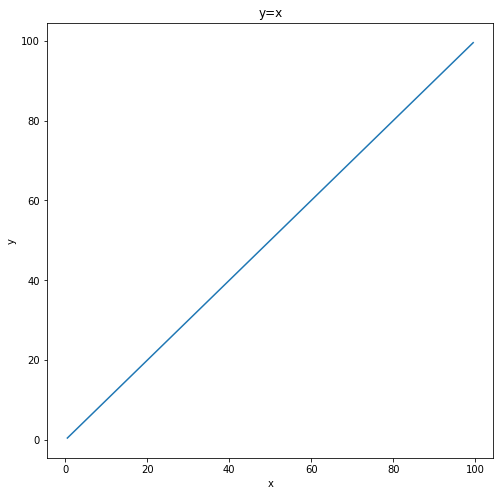

In [98]:
y = x
plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y=x")
plt.show()

2. $y=x^{2}$

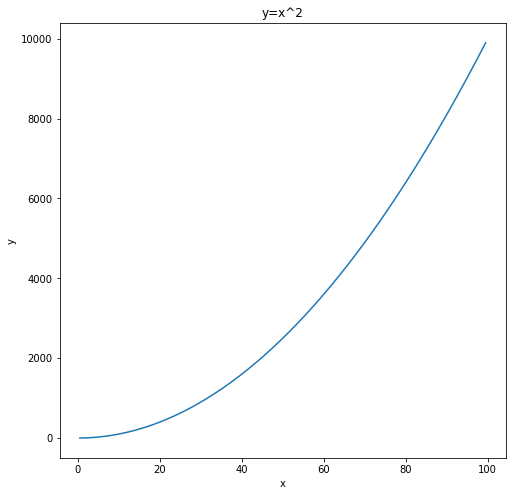

In [97]:
y = x**2
plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y=x^2")
plt.show()

3. $y=x^{3}/100$

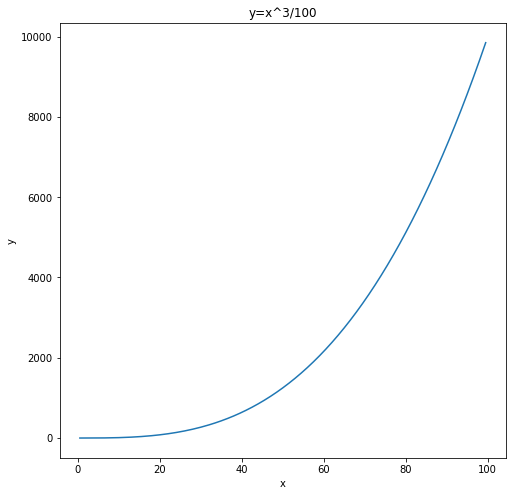

In [102]:
y = x**3 / 100
plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y=x^3/100")
plt.show()

4. $y=sin(x)$

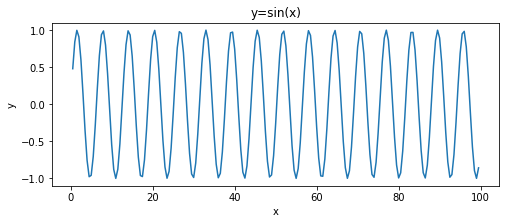

In [108]:
y = np.sin(x)
plt.figure(figsize=(8, 3))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y=sin(x)")
plt.show()

5. $y=sin(x)$

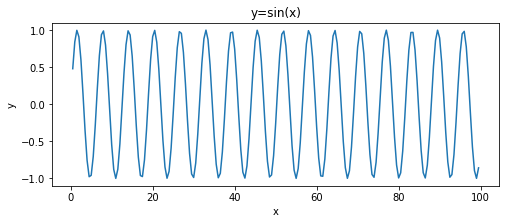

In [109]:
y = np.sin(x)
plt.figure(figsize=(8, 3))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y=sin(x)")
plt.show()

6. $y=log(x)$

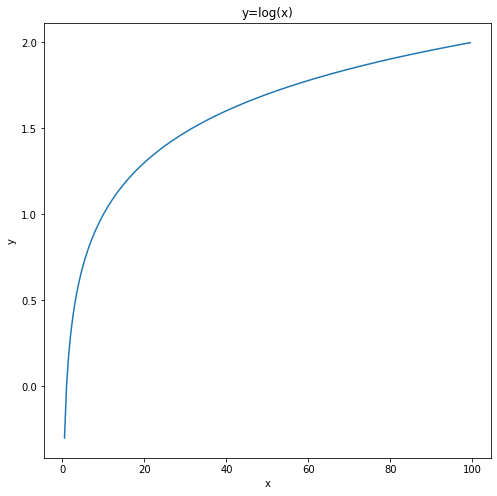

In [112]:
y = np.log10(x)
plt.figure(figsize=(8, 8))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y=log(x)")
plt.show()

7. $y=e^{x}$

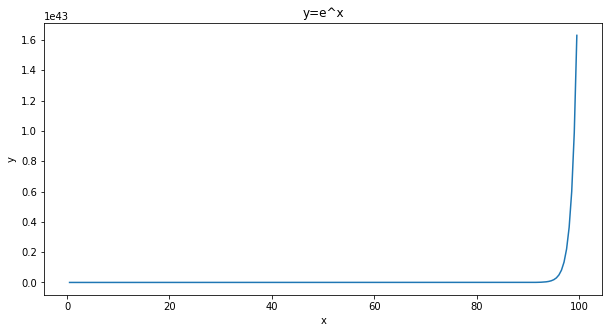

In [115]:
y = np.exp(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y=e^x")
plt.show()

## 10

In [116]:
matrix = np.random.uniform(low=1, high=2, size=(20, 5))
print(matrix.shape)
matrix

(20, 5)


array([[1.80447913, 1.65467427, 1.21290325, 1.2942455 , 1.71263953],
       [1.37400161, 1.77289655, 1.38230185, 1.63939878, 1.42081748],
       [1.49985891, 1.81857724, 1.24824171, 1.46942987, 1.51758666],
       [1.59150883, 1.4415124 , 1.46523082, 1.4461668 , 1.79497379],
       [1.81823616, 1.37775813, 1.73465604, 1.06559348, 1.0989231 ],
       [1.41457879, 1.9457704 , 1.62069876, 1.69922688, 1.94683483],
       [1.24148785, 1.70060653, 1.03105988, 1.28875529, 1.6281753 ],
       [1.66960565, 1.32284602, 1.17568263, 1.29660756, 1.2574033 ],
       [1.50690306, 1.35447236, 1.90157276, 1.73442204, 1.89648079],
       [1.57131733, 1.36787935, 1.37703041, 1.60971803, 1.44690833],
       [1.18177254, 1.91622372, 1.44518835, 1.89926682, 1.02548581],
       [1.0172893 , 1.92413608, 1.18958686, 1.15162687, 1.04697097],
       [1.70486795, 1.50936764, 1.98004043, 1.83122854, 1.12222636],
       [1.40840446, 1.95101765, 1.16939413, 1.51820474, 1.20110128],
       [1.69234304, 1.79339238, 1.

In [117]:
import pandas as pd

In [165]:
df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])
df

,a,b,c,d,e
0,1.804479,1.654674,1.212903,1.294245,1.712640
1,1.374002,1.772897,1.382302,1.639399,1.420817
2,1.499859,1.818577,1.248242,1.469430,1.517587
3,1.591509,1.441512,1.465231,1.446167,1.794974
4,1.818236,1.377758,1.734656,1.065593,1.098923
5,1.414579,1.945770,1.620699,1.699227,1.946835
6,1.241488,1.700607,1.031060,1.288755,1.628175
7,1.669606,1.322846,1.175683,1.296608,1.257403
8,1.506903,1.354472,1.901573,1.734422,1.896481
9,1.571317,1.367879,1.377030,1.609718,1.446908


In [166]:
stds = []
for i in df.columns:
  stds.append((i, df[i].std()))
stds = sorted(stds, key=lambda x: x[1], reverse=True)
print("Column with highest standard deviation is", stds[0][0], "with", stds[0][1])



Column with highest standard deviation is c with 0.3169545766501406


In [168]:
r = df.copy()
r["r_mean"] = r.mean(axis=1)
r = r[r["r_mean"] == r["r_mean"].min()].copy()
r.drop(["r_mean"], axis=1, inplace=True)
print("Row with the least mean is:")
print(r)

Row with the least mean is:
           a         b         c         d         e
15  1.696031  1.145565  1.104142  1.021371  1.094435


## 11

In [169]:
df["f"] = df.sum(axis=1)
df

,a,b,c,d,e,f
0,1.804479,1.654674,1.212903,1.294245,1.712640,7.678942
1,1.374002,1.772897,1.382302,1.639399,1.420817,7.589416
2,1.499859,1.818577,1.248242,1.469430,1.517587,7.553694
3,1.591509,1.441512,1.465231,1.446167,1.794974,7.739393
4,1.818236,1.377758,1.734656,1.065593,1.098923,7.095167
5,1.414579,1.945770,1.620699,1.699227,1.946835,8.627110
6,1.241488,1.700607,1.031060,1.288755,1.628175,6.890085
7,1.669606,1.322846,1.175683,1.296608,1.257403,6.722145
8,1.506903,1.354472,1.901573,1.734422,1.896481,8.393851
9,1.571317,1.367879,1.377030,1.609718,1.446908,7.372853


In [171]:
df["g"] = df["f"].apply(lambda x: "LT8" if x < 8 else "GT8")
df

,a,b,c,d,e,f,g
0,1.804479,1.654674,1.212903,1.294245,1.712640,7.678942,LT8
1,1.374002,1.772897,1.382302,1.639399,1.420817,7.589416,LT8
2,1.499859,1.818577,1.248242,1.469430,1.517587,7.553694,LT8
3,1.591509,1.441512,1.465231,1.446167,1.794974,7.739393,LT8
4,1.818236,1.377758,1.734656,1.065593,1.098923,7.095167,LT8
5,1.414579,1.945770,1.620699,1.699227,1.946835,8.627110,GT8
6,1.241488,1.700607,1.031060,1.288755,1.628175,6.890085,LT8
7,1.669606,1.322846,1.175683,1.296608,1.257403,6.722145,LT8
8,1.506903,1.354472,1.901573,1.734422,1.896481,8.393851,GT8
9,1.571317,1.367879,1.377030,1.609718,1.446908,7.372853,LT8


In [173]:
print("Number of column where g is LT8 is", df[df["g"] == "LT8"]["g"].count())

Number of column where g is LT8 is 15


In [175]:
print("Standard Deviation of f where g is LT8 is", df[df["g"] == "LT8"]["f"].std())
print("Standard Deviation of f where g is GT8 is", df[df["g"] == "GT8"]["f"].std())

Standard Deviation of f where g is LT8 is 0.5070365440848238
Standard Deviation of f where g is GT8 is 0.17330335095086935


## 12

In [185]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([5, 6])
print(A * B)

[[ 5 12]
 [15 24]
 [25 36]]


## 13

In [201]:
def argmin(arr):
  assert type(arr) == np.ndarray, "Not an numpy array"
  mi = arr[0]
  idx = 0
  for i in range(arr.shape[0]):
    if mi > arr[i]:
      mi = arr[i]
      idx = i
  return idx

In [204]:
arr = np.random.uniform(low=2, high=3, size=(100,))
print("Minimum value of array is", argmin(arr))
print("With np.argmin", np.argmin(arr))
assert np.argmin(arr) == argmin(arr), "Not equal"

Minimum value of array is 74
With np.argmin 74


Above cell shows that both the functions produce the same result

## References
- Numpy faster than list - https://towardsdatascience.com/how-fast-numpy-really-is-e9111df44347
- JAX - https://jax.readthedocs.io/en/latest/notebooks/autodiff_cookbook.html
- Sympy Calculus - https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html

 